#Deep Computer Vision

In this guide we will learn how to peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

##Image Data
So far, we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions. These 3 dimensions are as follows:
- image height
- image width
- color channels

The only item in the list above you may not understand is **color channels**. The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So, for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0-255.

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)

Keep this in mind as we discuss how our network works and the input/output of each layer. 



##Convolutional Neural Network
**Note:** I will use the term *convnet* and convolutional neural network interchangably.

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's becasue it is. 

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

*Let's have a look at how a densly connected layer would look at an image vs how a convolutional layer would.*

This is our image; the goal of our network will be to determine whether this image is a cat or not.
![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.
![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

Can you see why this might make these networks more useful?




###How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it. 

*Let's use an example to better illustrate this.*

We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

![alt text](https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c)

Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Now let's flip the image.
![alt text](https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W)

Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since convolutional layers learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present. 



###Multiple Convolutional Layers
In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.





##Feature Maps
You may see me use the term *feature map* throughout this tutorial. This term simply stands for a 3D tensor with two spacial axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that reprsents the prescence of spcific filters from the previous feature map. These are what we call *response maps*.

##Layer Parameters
A convolutional layer is defined by two key parameters.

####**Filters**
A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer reprsents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

Here's a great illustration from the book "Deep Learning with Python" by Francois Chollet (pg 124).
![alt text](https://drive.google.com/uc?export=view&id=1HcLvvLKvLCCGuGZPMvKYz437FbbCC2eB)

####**Sample Size**
This isn't really the best term to describe this, but each convolutional layer is going to examine n x m blocks of pixels in each image. Typically, we'll consider 3x3 or 5x5 blocks. In the example above we use a 3x3 "sample size". This size will be the same as the size of our filter. 

Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location. 




##Borders and Padding
The more mathematical of you may have realized that if we slide a filter of let's say size 3x3 over our image well consider less positions for our filter than pixels in our input. Look at the example below. 

*Image from "Deep Learning with Python" by Francois Chollet (pg 126).*
![alt text](https://drive.google.com/uc?export=view&id=1OEfXrV16NBjwAafgBfYYcWOyBCHqaZ5M)

This means our response map will have a slightly smaller width and height than our original image. This is fine but sometimes we want our response map to have the same dimensions. We can accomplish this by using something called *padding*.

**Padding** is simply the addition of the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.

##Strides
In the previous sections we assumed that the filters would be slid continously through the image such that it covered every possible position. This is common but sometimes we introduce the idea of a **stride** to our convolutional layer. The stride size reprsents how many rows/cols we will move the filter each time. These are not used very frequently so we'll move on.

##Pooling
You may recall that our convnets are made up of a stack of convolution and pooling layers.

The idea behind a pooling layer is to downsample our feature maps and reduce their dimensions. They work in a similar way to convolutional layers where they extract windows from the feature map and return a response map of the max, min or average values of each channel. Pooling is usually done using windows of size 2x2 and a stride of 2. This will reduce the size of the feature map by a factor of two and return a response map that is 2x smaller.

##A More Detailed Look
Please refer to the video to learn how all of this happens at the lower level! 

##Creating a Convnet

Now it is time to create our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn*

###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class. 

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.




In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 3s 0us/step


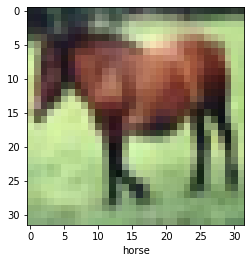

In [ ]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

##CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [ ]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


After looking at the summary you should notice that the depth of our image increases but the spacial dimensions reduce drastically.

##Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).



##Training
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

*Note: This will take much longer than previous models!*

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5471 - accuracy: 0.4345 - val_loss: 1.2665 - val_accuracy: 0.5440
Epoch 2/4
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1760 - accuracy: 0.5829 - val_loss: 1.1159 - val_accuracy: 0.6032
Epoch 3/4
1563/1563 [==============================] - 66s 43ms/step - loss: 1.0207 - accuracy: 0.6418 - val_loss: 1.0817 - val_accuracy: 0.6219
Epoch 4/4
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9231 - accuracy: 0.6761 - val_loss: 0.9263 - val_accuracy: 0.6749


##Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9263 - accuracy: 0.6749
0.6748999953269958


You should be getting an accuracy of about 70%. This isn't bad for a simple model like this.


##Object Detection
If you'd like to learn how you can perform object detection and recognition with tensorflow check out the guide below.

https://github.com/tensorflow/models/tree/master/research/object_detection

##Sources
1. “Convolutional Neural Network (CNN) &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/cnn.
2. “Transfer Learning with a Pretrained ConvNet &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/transfer_learning.
3. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

